# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## ML Caveats

### If the feature space is not correlated enough with the target variable, then generally  no model can have any meaningful predictive power.

### Individual variables do not necessarily need to have high correlations with the target variable (although this is generally a good thing), but altogether, the variables need to be correlated/predictive enough of the target variable. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'/Users/ianweimer/1083-albumin-data-exploration/ML'

In [3]:
df_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/gi_bleed_anemia_all-4.csv', index_col=0)

In [4]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2019-05-31 13:58:00  45.0   M  Black         1   >=1000    1   
1  2019-03-07 20:26:00  54.0   F  White         7  500-999    1   
2  2019-07-17 23:07:00  79.0   M  White         9   >=1000    0   
3  2020-06-21 14:45:00  75.0   M  Other         1   >=1000    0   
4  2017-01-12 17:18:00  74.0   F  Black         1   >=1000    0   

   total_ICU_LOS_hours    LOS_hours  mass_transfusion  total_transfusions  \
0          7956.633333  1016.016667                 0                   1   
1          4045.563333   531.133333                 1                   0   
2                  NaN    26.383333                 0                   1   
3                  NaN    50.916667                 0                   1   
4                  NaN  1500.383333                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    6                 0                   0   
1          none    4                 0                   1   
2        severe    6                 0                   1   
3          none    2                 1                   0   
4          none    6                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              758.111111               2.9                 3.2   
1               18.750000               3.1                 2.7   
2                2.806250               NaN                 NaN   
3                     NaN               NaN                 NaN   
4                     NaN               2.0                 2.4   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  \
0                            1.0                      1.0         8.4   
1                            0.0                      NaN        11.2   
2                            NaN                      NaN         4.8   
3                            NaN                      NaN        15.6   
4                            1.0                      0.0        14.7   

   time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                     1  11.0      1          0             1            0   
1                     0   NaN      0          1             0            0   
2                     1   NaN      0          0             1            0   
3                     1   NaN      1          0             0            0   
4                     1  15.0      1          0             1            0   

   SAPS  tenant  
0    34      45  
1    18      36  
2    29       7  
3    67      45  
4    28      46

In [5]:
df_alb.shape

(22192, 35)

In [6]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


In [7]:
df_alb.isnull().sum()

personid                             0
encounterid                          0
index_date                           0
age                                  2
sex                                 44
race                              1083
zip_code                             0
bed_size                             0
ICU                                  0
total_ICU_LOS_hours              15107
LOS_hours                            1
mass_transfusion                     0
total_transfusions                   0
anemia_status                        0
CCI                                  0
30_day_mortality                     0
30_day_readmission                   0
days_until_readmission            9400
bl_albumin_value                  8627
last_albumin_value                8627
albumin_lab_baseline_severity     8627
normal_albumin_achieved          13462
hemoglobin                         968
time_to_albumin                     93
albumin_timing                       0
5_percent_albumin        

## Load Non Albumin Data

In [8]:
df_no_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/no_albumin_gi_bleed_anemia_all-3.csv', index_col=0)

In [9]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2018-12-11 02:47:00  76.0   M  White         8   >=1000    0   
1  2018-12-22 18:14:00  80.0   F  White         1   >=1000    0   
2  2017-05-20 15:01:00  62.0   M  White         9   >=1000    0   
3  2018-11-29 21:57:00  86.0   M  White         0  500-999    0   
4  2020-02-08 21:45:16  75.0   F  White         3  500-999    0   

   total_ICU_LOS_hours   LOS_hours  mass_transfusion  total_transfusions  \
0                  NaN  208.016667                 0                   0   
1                  NaN  245.266667                 0                   1   
2                  NaN   51.650000                 0                   0   
3                  NaN  191.700000                 0                   1   
4                  NaN  121.412222                 0                   1   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    2                 0                   0   
1        severe    2                 0                   0   
2          none    3                 0                   0   
3      moderate    2                 0                   1   
4      moderate    5                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              321.625000               3.3                 2.9   
1               33.510417               NaN                 NaN   
2              559.286806               4.0                 3.4   
3               10.081944               3.3                 3.1   
4              122.702975               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  MELD  \
0                            0.0                      NaN         7.4  13.0   
1                            NaN                      NaN         4.3  11.0   
2                            0.0                      NaN        11.7   6.0   
3                            0.0                      NaN         8.0   7.0   
4                            NaN                      NaN         8.5   NaN   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  
0      1          1             0            0    22      63  
1      0          0             0            0    32      45  
2      0          1             0            0    33      68  
3      2          0             0            0    39      51  
4      0          0             0            0    16     113

In [10]:
df_no_alb.shape

(134739, 30)

In [11]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


In [12]:
df_no_alb.isnull().sum()

personid                              0
encounterid                           0
index_date                            0
age                                   1
sex                                 319
race                               5886
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              114288
LOS_hours                            20
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            39273
bl_albumin_value                  84489
last_albumin_value                84489
albumin_lab_baseline_severity     84489
normal_albumin_achieved          114420
hemoglobin                        19241
MELD                              75143
qSOFA                                 0


## Examine Difference In Vars

In [13]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [14]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [15]:
lst3 = [x for x in lst1 if x not in lst2]

In [16]:
lst3

['time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type']

In [17]:
df_alb[['time_to_albumin', 'albumin_timing', '5_percent_albumin', \
       '25_percent_albumin', 'unknown_albumin_type']].head(10)

time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   
5       550.833333               0                  1                   0   
6        17.600000               1                  0                   0   
7         2.250000               1                  0                   0   
8        73.900000               0                  0                   1   
9        38.790556               0                  0                   1   

   unknown_albumin_type  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1  
5                     0  
6                     1  
7                     1  
8                     0  
9                     0

## Remove variables not relevant to analysis 

In [18]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [19]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [20]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [21]:
df_alb.shape

(22192, 35)

In [22]:
df_no_alb.shape

(134739, 30)

In [23]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0   M  Black         1   >=1000    1          7956.633333  1016.016667   
1  54.0   F  White         7  500-999    1          4045.563333   531.133333   
2  79.0   M  White         9   >=1000    0                  NaN    26.383333   
3  75.0   M  Other         1   >=1000    0                  NaN    50.916667   
4  74.0   F  Black         1   >=1000    0                  NaN  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 2.7                            0.0                      NaN   
2                 NaN                            NaN                      NaN   
3                 NaN                            NaN                      NaN   
4                 2.4                            1.0                      0.0   

   hemoglobin  time_to_albumin  albumin_timing  5_percent_albumin  \
0         8.4       166.966667               0                  0   
1        11.2       225.116667               0                  0   
2         4.8         3.018056               1                  0   
3        15.6        28.250000               0                  1   
4        14.7       189.700000               0                  0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                   0                     1  11.0      1          0   
1                   1                     0   NaN      0          1   
2                   1                     1   NaN      0          0   
3                   1                     1   NaN      1          0   
4                   0                     1  15.0      1          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
1             0            0    18      36        1  
2             1            0    29       7        1  
3             0            0    67      45        1  
4             1            0    28      46        1

In [24]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours   LOS_hours  \
0  76.0   M  White         8   >=1000    0                  NaN  208.016667   
1  80.0   F  White         1   >=1000    0                  NaN  245.266667   
2  62.0   M  White         9   >=1000    0                  NaN   51.650000   
3  86.0   M  White         0  500-999    0                  NaN  191.700000   
4  75.0   F  White         3  500-999    0                  NaN  121.412222   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   0      moderate    2                 0   
1                 0                   1        severe    2                 0   
2                 0                   0          none    3                 0   
3                 0                   1      moderate    2                 0   
4                 0                   1      moderate    5                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              321.625000               3.3   
1                   0               33.510417               NaN   
2                   0              559.286806               4.0   
3                   1               10.081944               3.3   
4                   0              122.702975               NaN   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 2.9                            0.0                      NaN   
1                 NaN                            NaN                      NaN   
2                 3.4                            0.0                      NaN   
3                 3.1                            0.0                      NaN   
4                 NaN                            NaN                      NaN   

   hemoglobin  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0         7.4  13.0      1          1             0            0    22   
1         4.3  11.0      0          0             0            0    32   
2        11.7   6.0      0          1             0            0    33   
3         8.0   7.0      2          0             0            0    39   
4         8.5   NaN      0          0             0            0    16   

   tenant  albumin  
0      63        0  
1      45        0  
2      68        0  
3      51        0  
4     113        0

## Combine Datasets

In [25]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [26]:
df.shape

(156931, 35)

In [27]:
df.head(50)

personid  \
0   001c4742-8e99-4929-9b1c-0b8c6f3e230a   
1   019634ce-13e2-4f8c-9f7f-ba5fba461d1f   
2   01d02e7a-3cd1-47dd-9d5f-188e591a04df   
3   05b4f125-f42f-4ade-ad65-f6d591c51790   
4   077a4e0b-b3ba-4025-a8b6-46a51d5183c6   
5   088a0350-8d51-43dd-9472-b208278372ae   
6   0a3154dd-d980-434a-af99-6f25cad83298   
7   0bffecfb-6f3f-4fba-a73f-684dfb888b33   
8   10b58aae-9abd-40f6-b1ed-fb394b5a8e57   
9   138a5556-63ee-4e60-b826-e1dc72628a0a   
10  19ae9a31-6f48-41e9-8902-65e6b2d3d001   
11  1b32ad01-1ee5-4c32-939b-eb6e6e5e3a48   
12  1d7f46c0-6f92-403b-b24c-cb4b653dca99   
13  1df390c3-18b8-41b0-acd9-23495059e97a   
14  1f7e4dd3-9985-4039-8099-ecea6ec7b94d   
15  1fd1313b-acbb-4744-828f-6a6809dbf561   
16  23221ca2-943d-40b1-8566-dc3e9d515775   
17  247c6aba-af0a-47fb-989a-f529ab420605   
18  2634b554-7b04-4abf-969d-2ffcde666661   
19  28ed58a7-f0a6-4383-8fa4-2e902b48ffc4   
20  2a2b87b9-905b-4ab7-8ba2-d63e7a3618ca   
21  2ab3ed5c-6e1d-41b0-b298-87aa387ceb13   
22  2b0bd82b-e305-4991-baf2-49a302ab1d2e   
23  2b4b67be-894a-415d-b241-6f64f5220bfb   
24  2d4989b3-7bd5-43a9-bf7f-f23e1b9bcb22   
25  2e2a8de8-2c5c-4a16-9fec-24e32d68ee56   
26  304a6435-d093-46ba-9eeb-28c65cfadf65   
27  3156e8fc-240f-40c8-8db2-c2446b652659   
28  359efbf5-44c0-4454-b18a-85a8e961d0d2   
29  36bac901-4c48-46d1-80dd-96cd8705fccd   
30  370a3e99-33e6-404a-8db4-187b1ba0a648   
31  37538836-dd53-4916-8614-d2d5067d17bd   
32  385016ac-0885-4fd8-8761-c65af40f66da   
33  394ffd20-e1e7-44c2-b991-93f115e71da0   
34  39d47ec2-2f69-4ab7-a93a-c59319331259   
35  3cc07cf0-d9b1-486a-a33f-7a0db69304dd   
36  3dd84581-4d59-43f2-ad28-8533144312cc   
37  3e61e48c-91d7-466b-8dff-89c791002dc6   
38  43c7671f-8311-40d6-861f-91e668874c01   
39  4977e0ee-27ef-4f1f-9833-3e26ddbc39b3   
40  4a8d6b06-391b-4c3d-8f9c-3dfd1f2cbffa   
41  4bf4a15e-626c-429c-9e90-86f7d31bc966   
42  4daa05d1-bbf7-462f-8623-fed7204b3135   
43  4ead1736-858d-4cdb-9adc-76a6660ca497   
44  4f141045-4c7d-4084-ae1d-99a994aebec8   
45  511e7212-cb6a-4a04-9d88-7f9fc66014d8   
46  51ae902d-1230-4cd4-b1b0-f8d5161d9f27   
47  51dabe14-cc4a-452c-9b2c-8d8d63b921c8   
48  52fa1f23-6e2e-4e9d-8c3e-9fe2265e946f   
49  53cd5eeb-a66b-4683-8950-845856616db6   

                             encounterid   age sex   race  zip_code bed_size  \
0   4f8fae0f-a286-4120-b78c-c60086d95f88  45.0   M  Black         1   >=1000   
1   9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a  54.0   F  White         7  500-999   
2   eef69bb8-c0a3-425d-b016-7df3a2903ed5  79.0   M  White         9   >=1000   
3   2ae26cea-7902-40ea-9f24-d65f49d03724  75.0   M  Other         1   >=1000   
4   2227d951-5657-47a0-aa62-4dcd86d6d04d  74.0   F  Black         1   >=1000   
5   3d2b1e18-f0ca-42d7-9de1-f46dfcd400a9  42.0   M  Other         0   >=1000   
6   6466f5b2-20e7-4176-9f9c-2d9aeb4219f3  54.0   M  Other         1  500-999   
7   ae7dea86-adfc-48b9-84dd-bf7c4857f6e9  80.0   F  White         6  500-999   
8   2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb  69.0   M  White         8   >=1000   
9   57dc97c2-2c28-43a1-8c15-bf7d918c6adc  73.0   M  White         2  500-999   
10  2c452c1e-8405-4692-baf1-1b2159d32e56  74.0   F  White         1   >=1000   
11  dd91c4d5-223e-41c9-afb1-894bb57b5d52  68.0   M  White         2  300-499   
12  a4e130d7-c9d0-4c2b-a71c-6d2540891463  73.0   M  White         6  500-999   
13  83aedaea-94b0-405c-a1ea-94fee7f50b52  58.0   M  Black         2  500-999   
14  b08d47a1-2a9e-4b7a-b008-f71641dcb93a  70.0   F  White         8   >=1000   
15  5d04e556-8062-4b2b-b6a1-6b0acf42cc83  69.0   M  White         1   >=1000   
16  ea4557d7-2508-45a7-ac19-9655112734ee  87.0   M  White         3  500-999   
17  7190384c-1ac1-4939-b4e8-c55282fcfcaf  77.0   F  White         1   >=1000   
18  4eeb4e42-95c6-4b90-8849-60920805623b  87.0   F  White         6  500-999   
19  b4696974-2401-4aac-88c3-e398df348d35  54.0   F  White         8   >=1000   
20  61c5c634-45f5-4671-a17e-021071364ddd  54.0   F  White         1   >=1000   
21  0298c107-0e87-48fc-a9ca

In [28]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'total_ICU_LOS_hours', 'LOS_hours', 'mass_transfusion',
       'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality',
       '30_day_readmission', 'days_until_readmission', 'bl_albumin_value',
       'last_albumin_value', 'albumin_lab_baseline_severity',
       'normal_albumin_achieved', 'hemoglobin', 'time_to_albumin',
       'albumin_timing', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'SAPS', 'tenant', 'albumin'],
      dtype='object')

## Look at variables, null values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   personid                       156931 non-null  object 
 1   encounterid                    156931 non-null  object 
 2   age                            156928 non-null  float64
 3   sex                            156568 non-null  object 
 4   race                           149962 non-null  object 
 5   zip_code                       156931 non-null  int64  
 6   bed_size                       156870 non-null  object 
 7   ICU                            156931 non-null  int64  
 8   total_ICU_LOS_hours            27536 non-null   float64
 9   LOS_hours                      156910 non-null  float64
 10  mass_transfusion               156931 non-null  int64  
 11  total_transfusions             156931 non-null  int64  
 12  anemia_status                 

In [30]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              129395
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
time_to_albumin                  134832
albumin_timing                   134739
5_percent_albumin                134739


## Fill or Drop Rows with Null Values, Other

In [31]:
# drop time_to_albumin variable

# drop null time_to_albumin variable because it is problematic
# with no_albumin data

df.drop(columns = ['time_to_albumin'], inplace=True)

In [32]:
# drop the following variables, as previous analysis determined they were 
# either collinear with other variables, or not useful for predictions

# age, sex, bed_size, last_albumin_value, hemoglobin

df.drop(columns = ['age', 'sex', 'bed_size', 'last_albumin_value', \
                   'hemoglobin'], inplace=True)

In [33]:
# change name of albumin_timing to albumin_24hrs var

df.rename(columns = {'albumin_timing':'albumin_24hrs'}, inplace=True)

## Remove albumin_lab_baseline_severity variable

In [34]:
df['albumin_lab_baseline_severity'].value_counts()

0.0    34766
1.0    29049
Name: albumin_lab_baseline_severity, dtype: int64

In [35]:
# it is all 1s provides no value

df.drop(columns = ['albumin_lab_baseline_severity'], inplace=True)

In [36]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    race  zip_code  ICU  total_ICU_LOS_hours    LOS_hours  mass_transfusion  \
0  Black         1    1          7956.633333  1016.016667                 0   
1  White         7    1          4045.563333   531.133333                 1   
2  White         9    0                  NaN    26.383333                 0   
3  Other         1    0                  NaN    50.916667                 0   
4  Black         1    0                  NaN  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    4                 0   
2                   1        severe    6                 0   
3                   1          none    2                 1   
4                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   normal_albumin_achieved  albumin_24hrs  5_percent_albumin  \
0                      1.0            0.0                0.0   
1                      NaN            0.0                0.0   
2                      NaN            1.0                0.0   
3                      NaN            0.0                1.0   
4                      0.0            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   NaN      0          1   
2                 1.0                   1.0   NaN      0          0   
3                 1.0                   1.0   NaN      1          0   
4                 0.0                   1.0  15.0      1          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
1             0            0    18      36        1  
2             1            0    29       7        1  
3             0            0    67      45        1  
4             1            0    28      46        1

In [37]:
# fill in all NA related to albumin variables with 0
# fill in total ICU LOS hours with 0

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)
df['5_percent_albumin'] = df['5_percent_albumin'].fillna(0)
df['25_percent_albumin'] = df['25_percent_albumin'].fillna(0)
df['unknown_albumin_type'] = df['unknown_albumin_type'].fillna(0)
# df['total_ICU_LOS_hours'] = df['total_ICU_LOS_hours'].fillna(0)

In [38]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    race  zip_code  ICU  total_ICU_LOS_hours    LOS_hours  mass_transfusion  \
0  Black         1    1          7956.633333  1016.016667                 0   
1  White         7    1          4045.563333   531.133333                 1   
2  White         9    0                  NaN    26.383333                 0   
3  Other         1    0                  NaN    50.916667                 0   
4  Black         1    0                  NaN  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    4                 0   
2                   1        severe    6                 0   
3                   1          none    2                 1   
4                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   normal_albumin_achieved  albumin_24hrs  5_percent_albumin  \
0                      1.0            0.0                0.0   
1                      NaN            0.0                0.0   
2                      NaN            1.0                0.0   
3                      NaN            0.0                1.0   
4                      0.0            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   NaN      0          1   
2                 1.0                   1.0   NaN      0          0   
3                 1.0                   1.0   NaN      1          0   
4                 0.0                   1.0  15.0      1          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
1             0            0    18      36        1  
2             1            0    29       7        1  
3             0            0    67      45        1  
4             1            0    28      46        1

In [39]:
df.isnull().sum()

personid                        0
encounterid                     0
race                         6969
zip_code                        0
ICU                             0
total_ICU_LOS_hours        129395
LOS_hours                      21
mass_transfusion                0
total_transfusions              0
anemia_status                   0
CCI                             0
30_day_mortality                0
30_day_readmission              0
days_until_readmission      48673
bl_albumin_value            93116
normal_albumin_achieved    127882
albumin_24hrs                   0
5_percent_albumin               0
25_percent_albumin              0
unknown_albumin_type            0
MELD                        87873
qSOFA                           0
Cirrhosis                       0
beta_blocker                    0
hemorrhagic                     0
SAPS                            0
tenant                          0
albumin                         0
dtype: int64

In [40]:
# Remove days until readmission
# this outcome can be looked at in a separate analysis 

df.drop(columns=['days_until_readmission'], inplace=True)

In [41]:
# Remove ICU Length of Stay
# this outcome can be looked at in a separate analysis 

df.drop(columns=['total_ICU_LOS_hours'], inplace=True)

In [42]:
df.isnull().sum()

personid                        0
encounterid                     0
race                         6969
zip_code                        0
ICU                             0
LOS_hours                      21
mass_transfusion                0
total_transfusions              0
anemia_status                   0
CCI                             0
30_day_mortality                0
30_day_readmission              0
bl_albumin_value            93116
normal_albumin_achieved    127882
albumin_24hrs                   0
5_percent_albumin               0
25_percent_albumin              0
unknown_albumin_type            0
MELD                        87873
qSOFA                           0
Cirrhosis                       0
beta_blocker                    0
hemorrhagic                     0
SAPS                            0
tenant                          0
albumin                         0
dtype: int64

In [43]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [44]:
df.shape

(156931, 25)

## Drop normal_albumin_achieved var

In [45]:
df.drop(columns = ['normal_albumin_achieved'], inplace=True)

In [46]:
df.isnull().sum()

personid                    0
encounterid                 0
zip_code                    0
ICU                         0
LOS_hours                  21
mass_transfusion            0
total_transfusions          0
anemia_status               0
CCI                         0
30_day_mortality            0
30_day_readmission          0
bl_albumin_value        93116
albumin_24hrs               0
5_percent_albumin           0
25_percent_albumin          0
unknown_albumin_type        0
MELD                    87873
qSOFA                       0
Cirrhosis                   0
beta_blocker                0
hemorrhagic                 0
SAPS                        0
tenant                      0
albumin                     0
dtype: int64

In [47]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [48]:
df.isnull().sum()

personid                0
encounterid             0
zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
MELD                    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
albumin                 0
dtype: int64

In [49]:
df.shape

(32941, 24)

In [50]:
df['albumin'].value_counts()

0    27000
1     5941
Name: albumin, dtype: int64

In [51]:
df['qSOFA'].describe()

count    32941.000000
mean         0.496554
std          0.698790
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: qSOFA, dtype: float64

In [52]:
df['SAPS'].describe()

count    32941.000000
mean        26.924107
std         12.402597
min          0.000000
25%         18.000000
50%         25.000000
75%         33.000000
max        112.000000
Name: SAPS, dtype: float64

## Drop patientid and encounterid variables

In [53]:
df.shape

(32941, 24)

In [54]:
df['personid'].nunique()

30488

In [55]:
df['encounterid'].nunique()

32941

In [56]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [57]:
df.shape

(32941, 22)

In [58]:
df.head()

zip_code  ICU    LOS_hours  mass_transfusion  total_transfusions  \
0          1    1  1016.016667                 0                   1   
4          1    0  1500.383333                 0                   0   
9          2    0   135.266667                 0                   0   
14         8    0   333.866667                 0                   0   
22         2    1   124.643889                 0                   2   

   anemia_status  CCI  30_day_mortality  30_day_readmission  bl_albumin_value  \
0       moderate    6                 0                   0               2.9   
4           none    6                 0                   0               2.0   
9         severe    2                 0                   0               1.5   
14          none    2                 0                   0               3.9   
22          none    2                 1                   0               2.8   

    albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0             0.0                0.0                 0.0   
4             0.0                0.0                 0.0   
9             0.0                0.0                 1.0   
14            1.0                1.0                 1.0   
22            0.0                0.0                 1.0   

    unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                    1.0  11.0      1          0             1            0   
4                    1.0  15.0      1          0             1            0   
9                    0.0   9.0      0          1             0            0   
14                   0.0  10.0      0          0             1            0   
22                   1.0   7.0      0          0             0            0   

    SAPS  tenant  albumin  
0     34      45        1  
4     28      46        1  
9     43     111        1  
14    41      63        1  
22    21      27        1

In [59]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32941 entries, 0 to 134737
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zip_code              32941 non-null  int64  
 1   ICU                   32941 non-null  int64  
 2   LOS_hours             32941 non-null  float64
 3   mass_transfusion      32941 non-null  int64  
 4   total_transfusions    32941 non-null  int64  
 5   anemia_status         32941 non-null  object 
 6   CCI                   32941 non-null  int64  
 7   30_day_mortality      32941 non-null  int64  
 8   30_day_readmission    32941 non-null  int64  
 9   bl_albumin_value      32941 non-null  float64
 10  albumin_24hrs         32941 non-null  float64
 11  5_percent_albumin     32941 non-null  float64
 12  25_percent_albumin    32941 non-null  float64
 13  unknown_albumin_type  32941 non-null  float64
 14  MELD                  32941 non-null  float64
 15  qSOFA             

## Encode Variables as Necessary

In [60]:
# Binary Variables: sex (removed)

# Ordinal Variables: bed_size (removed), anemia_status

# Neither: race (removed)

In [61]:
df['anemia_status'].value_counts()

moderate    12598
none         8671
severe       8611
mild         3061
Name: anemia_status, dtype: int64

In [62]:
# used ordinal encoder
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer((OrdinalEncoder(categories=as_ord), \
                                      ['anemia_status']))

In [63]:
df = df.reset_index(drop=True)

In [64]:
df.isnull().sum()

zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
MELD                    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
albumin                 0
dtype: int64

In [65]:
df['anemia_status'].value_counts()

moderate    12598
none         8671
severe       8611
mild         3061
Name: anemia_status, dtype: int64

In [66]:
df['anemia_status'] = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['anemia_status'])

In [67]:
df['anemia_status'].value_counts()

2.0    12598
0.0     8671
3.0     8611
1.0     3061
Name: anemia_status, dtype: int64

In [68]:
df.columns.tolist()

['zip_code',
 'ICU',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'bl_albumin_value',
 'albumin_24hrs',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant',
 'albumin']

In [69]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [70]:
# quick look at distributions

df.describe()

zip_code           ICU     LOS_hours  mass_transfusion  \
count  32941.000000  32941.000000  32941.000000      32941.000000   
mean       4.650861      0.229107    230.911584          0.035184   
std        3.433891      0.420264    388.145630          0.184248   
min        0.000000      0.000000      1.200000          0.000000   
25%        1.000000      0.000000     76.283333          0.000000   
50%        5.000000      0.000000    126.083333          0.000000   
75%        8.000000      0.000000    248.229444          0.000000   
max        9.000000      1.000000  24754.500000          1.000000   

       total_transfusions  anemia_status           CCI  30_day_mortality  \
count        32941.000000   32941.000000  32941.000000      32941.000000   
mean             0.853192       1.642027      3.672202          0.081297   
std              1.932624       1.130989      2.698064          0.273295   
min              0.000000       0.000000      0.000000          0.000000   
25%              0.000000       0.000000      2.000000          0.000000   
50%              0.000000       2.000000      3.000000          0.000000   
75%              1.000000       3.000000      5.000000          0.000000   
max             99.000000       3.000000     19.000000          1.000000   

       30_day_readmission  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
count        32941.000000       32941.00000   32941.000000       32941.000000   
mean             0.289730           3.09949       0.066482           0.065784   
std              0.453644           0.69832       0.249127           0.247908   
min              0.000000           0.00270       0.000000           0.000000   
25%              0.000000           2.60000       0.000000           0.000000   
50%              0.000000           3.10000       0.000000           0.000000   
75%              1.000000           3.60000       0.000000           0.000000   
max              1.000000           6.30000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type          MELD         qSOFA  \
count        32941.000000          32941.000000  32941.000000  32941.000000   
mean             0.095990              0.106190     12.488274      0.496554   
std              0.294582              0.308085      6.910656      0.698790   
min              0.000000              0.000000      6.000000      0.000000   
25%              0.000000              0.000000      8.000000      0.000000   
50%              0.000000              0.000000     10.000000      0.000000   
75%              0.000000              0.000000     15.000000      1.000000   
max              1.000000              1.000000     40.000000      3.000000   

          Cirrhosis  beta_blocker   hemorrhagic          SAPS        tenant  \
count  32941.000000  32941.000000  32941.000000  32941.000000  32941.000000   
mean       0.241766      0.339364      0.071370     26.924107     60.179867   
std        0.428159      0.473501      0.257446     12.402597     22.777380   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000     18.000000     45.000000   
50%        0.000000      0.000000      0.000000     25.000000     63.000000   
75%        0.000000      1.000000      0.000000     33.000000     68.000000   
max        1.000000      1.000000      1.000000    112.000000    120.000000   

            albumin  
count  32941.000000  
mean       0.180353  
std        0.384487  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [71]:
df.isnull().sum()

zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
MELD                    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
albumin                 0
dtype: int64

In [72]:
df.drop(columns=['zip_code'], inplace=True)

## Remove outliers

In [73]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['total_transfusions', 'LOS_hours', 'SAPS']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [74]:
df.shape

(31732, 21)

In [75]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
2    0   135.266667                 0                   0            3.0    2   
3    0   333.866667                 0                   0            0.0    2   
4    1   124.643889                 0                   2            0.0    2   
5    0   884.533333                 0                   0            2.0    3   

   30_day_mortality  30_day_readmission  bl_albumin_value  albumin_24hrs  \
0                 0                   0               2.9            0.0   
2                 0                   0               1.5            0.0   
3                 0                   0               3.9            1.0   
4                 1                   0               2.8            0.0   
5                 0                   0               1.5            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
2                0.0                 1.0                   0.0   9.0      0   
3                1.0                 1.0                   0.0  10.0      0   
4                0.0                 1.0                   1.0   7.0      0   
5                0.0                 1.0                   0.0  18.0      3   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          0             1            0    34      45        1  
2          1             0            0    43     111        1  
3          0             1            0    41      63        1  
4          0             0            0    21      27        1  
5          0             1            0    45      63        1

## Save a copy of the df

In [76]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

## Length of Stay (LOS)

In [77]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission'])

In [78]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
2    0   135.266667                 0                   0            3.0    2   
3    0   333.866667                 0                   0            0.0    2   
4    1   124.643889                 0                   2            0.0    2   
5    0   884.533333                 0                   0            2.0    3   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
2               1.5            0.0                0.0                 1.0   
3               3.9            1.0                1.0                 1.0   
4               2.8            0.0                0.0                 1.0   
5               1.5            0.0                0.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
2                   0.0   9.0      0          1             0            0   
3                   0.0  10.0      0          0             1            0   
4                   1.0   7.0      0          0             0            0   
5                   0.0  18.0      3          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
2    43     111        1  
3    41      63        1  
4    21      27        1  
5    45      63        1

In [79]:
df['albumin_24hrs'].describe()

count    31732.000000
mean         0.060601
std          0.238601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [80]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
2    0   135.266667                 0                   0            3.0    2   
3    0   333.866667                 0                   0            0.0    2   
4    1   124.643889                 0                   2            0.0    2   
5    0   884.533333                 0                   0            2.0    3   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
2               1.5            0.0                0.0                 1.0   
3               3.9            1.0                1.0                 1.0   
4               2.8            0.0                0.0                 1.0   
5               1.5            0.0                0.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
2                   0.0   9.0      0          1             0            0   
3                   0.0  10.0      0          0             1            0   
4                   1.0   7.0      0          0             0            0   
5                   0.0  18.0      3          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
2    43     111        1  
3    41      63        1  
4    21      27        1  
5    45      63        1

In [81]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

anemia_status          -0.165812
bl_albumin_value       -0.127769
tenant                 -0.023937
Cirrhosis              -0.000584
total_transfusions      0.003565
hemorrhagic             0.088755
albumin_24hrs           0.112184
ICU                     0.120670
MELD                    0.129574
beta_blocker            0.141730
mass_transfusion        0.144082
qSOFA                   0.180162
SAPS                    0.201489
CCI                     0.201787
25_percent_albumin      0.310441
5_percent_albumin       0.313104
unknown_albumin_type    0.384065
albumin                 0.436857
LOS_hours               1.000000
Name: LOS_hours, dtype: float64


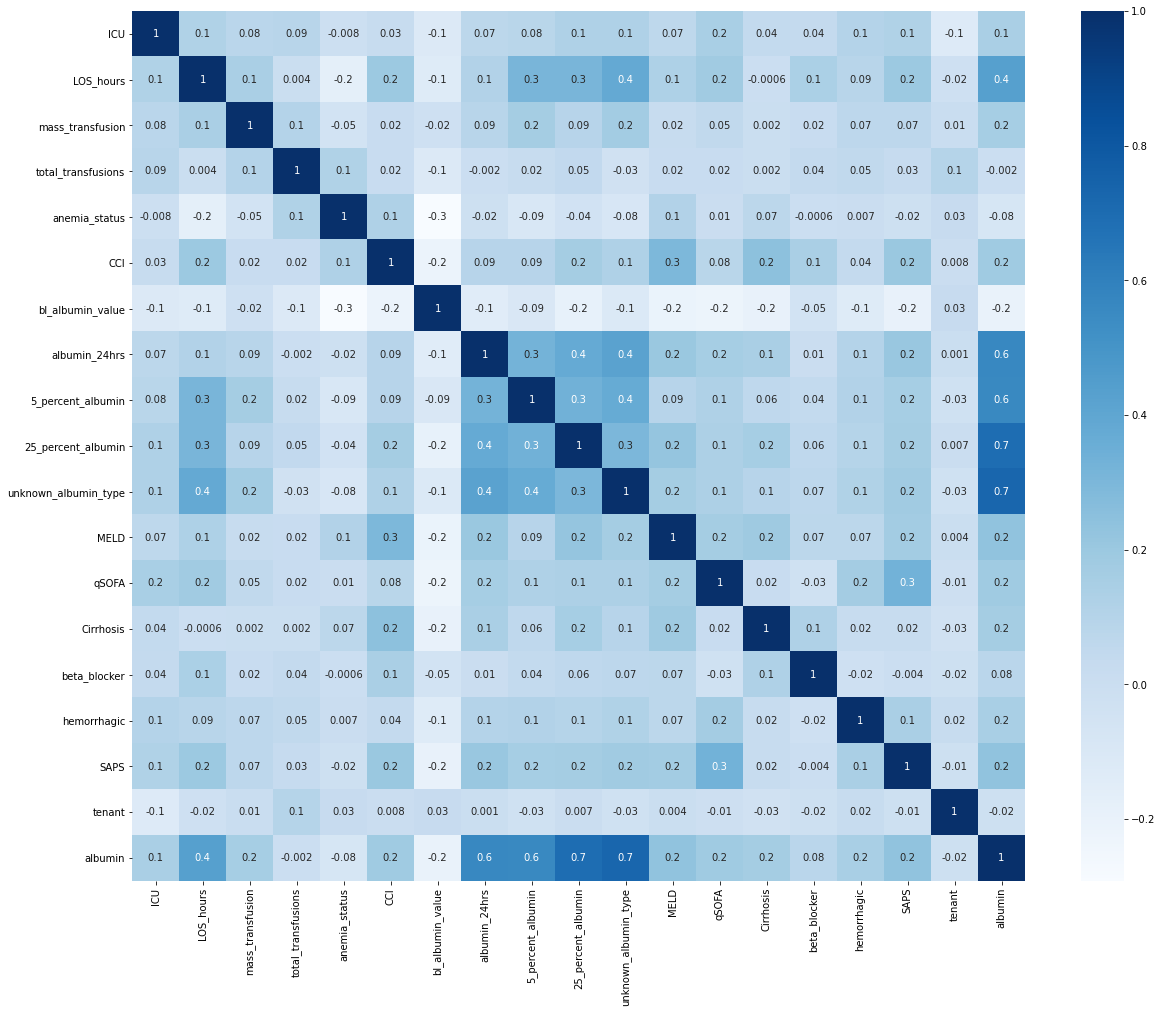

In [82]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [83]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
2    0   135.266667                 0                   0            3.0    2   
3    0   333.866667                 0                   0            0.0    2   
4    1   124.643889                 0                   2            0.0    2   
5    0   884.533333                 0                   0            2.0    3   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
2               1.5            0.0                0.0                 1.0   
3               3.9            1.0                1.0                 1.0   
4               2.8            0.0                0.0                 1.0   
5               1.5            0.0                0.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
2                   0.0   9.0      0          1             0            0   
3                   0.0  10.0      0          0             1            0   
4                   1.0   7.0      0          0             0            0   
5                   0.0  18.0      3          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
2    43     111        1  
3    41      63        1  
4    21      27        1  
5    45      63        1

In [84]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [85]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [86]:
sig_df

Var      Corr        p-value
0                    ICU  0.120670  3.181934e-103
1              LOS_hours  1.000000   0.000000e+00
2       mass_transfusion  0.144082  8.940871e-147
3     total_transfusions  0.003565   5.253882e-01
4          anemia_status -0.165812  2.209218e-194
5                    CCI  0.201787  8.405266e-289
6       bl_albumin_value -0.127769  1.369035e-115
7          albumin_24hrs  0.112184   2.173888e-89
8      5_percent_albumin  0.313104   0.000000e+00
9     25_percent_albumin  0.310441   0.000000e+00
10  unknown_albumin_type  0.384065   0.000000e+00
11                  MELD  0.129574  7.511065e-119
12                 qSOFA  0.180162  1.109194e-229
13             Cirrhosis -0.000584   9.171222e-01
14          beta_blocker  0.141730  4.859095e-142
15           hemorrhagic  0.088755   1.620354e-56
16                  SAPS  0.201489  6.144966e-288
17                tenant -0.023937   2.004035e-05
18               albumin  0.436857   0.000000e+00

In [87]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                    ICU  0.120670  3.181934e-103
1              LOS_hours  1.000000   0.000000e+00
2       mass_transfusion  0.144082  8.940871e-147
4          anemia_status -0.165812  2.209218e-194
5                    CCI  0.201787  8.405266e-289
6       bl_albumin_value -0.127769  1.369035e-115
7          albumin_24hrs  0.112184   2.173888e-89
8      5_percent_albumin  0.313104   0.000000e+00
9     25_percent_albumin  0.310441   0.000000e+00
10  unknown_albumin_type  0.384065   0.000000e+00
11                  MELD  0.129574  7.511065e-119
12                 qSOFA  0.180162  1.109194e-229
14          beta_blocker  0.141730  4.859095e-142
15           hemorrhagic  0.088755   1.620354e-56
16                  SAPS  0.201489  6.144966e-288
17                tenant -0.023937   2.004035e-05
18               albumin  0.436857   0.000000e+00

In [88]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
3   total_transfusions  0.003565  0.525388
13           Cirrhosis -0.000584  0.917122

## 30D Mortality

In [89]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission'])

In [90]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
2    0                 0                   0            3.0    2   
3    0                 0                   0            0.0    2   
4    1                 0                   2            0.0    2   
5    0                 0                   0            2.0    3   

   30_day_mortality  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
0                 0               2.9            0.0                0.0   
2                 0               1.5            0.0                0.0   
3                 0               3.9            1.0                1.0   
4                 1               2.8            0.0                0.0   
5                 0               1.5            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
2                 1.0                   0.0   9.0      0          1   
3                 1.0                   0.0  10.0      0          0   
4                 1.0                   1.0   7.0      0          0   
5                 1.0                   0.0  18.0      3          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
2             0            0    43     111        1  
3             1            0    41      63        1  
4             0            0    21      27        1  
5             1            0    45      63        1

## Correlations

In [91]:
# look at variable correlations with 30 day mortality
corr_mat = f_df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

bl_albumin_value       -0.144893
anemia_status          -0.029803
beta_blocker           -0.026872
30_day_readmission     -0.011364
tenant                  0.004802
total_transfusions      0.012683
Cirrhosis               0.043202
LOS_hours               0.072594
mass_transfusion        0.074364
ICU                     0.103216
hemorrhagic             0.104407
albumin_24hrs           0.120428
CCI                     0.148146
qSOFA                   0.159650
MELD                    0.162916
5_percent_albumin       0.164493
unknown_albumin_type    0.190720
25_percent_albumin      0.199798
SAPS                    0.203976
albumin                 0.248116
30_day_mortality        1.000000
Name: 30_day_mortality, dtype: float64


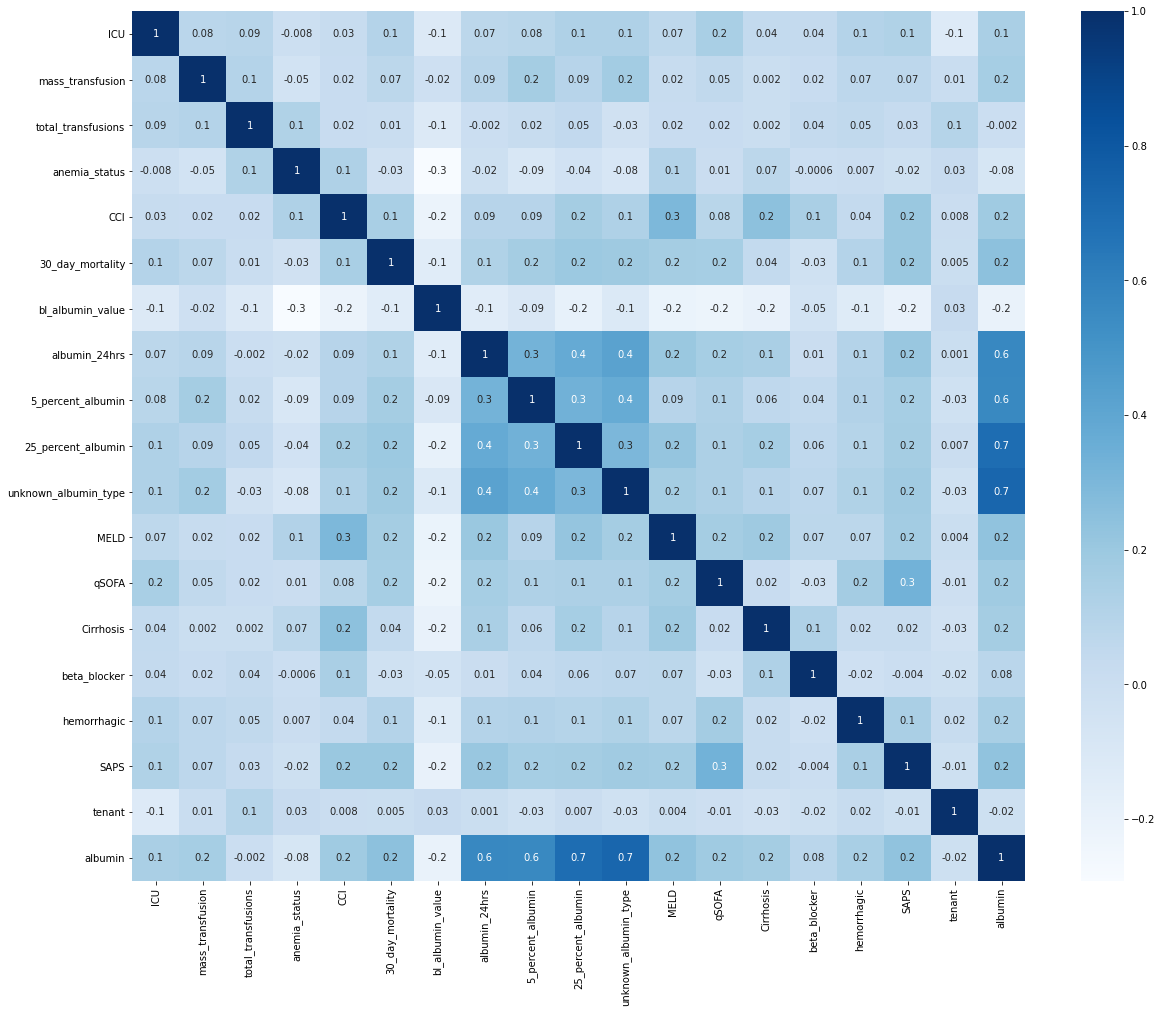

In [92]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [93]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
2    0                 0                   0            3.0    2   
3    0                 0                   0            0.0    2   
4    1                 0                   2            0.0    2   
5    0                 0                   0            2.0    3   

   30_day_mortality  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
0                 0               2.9            0.0                0.0   
2                 0               1.5            0.0                0.0   
3                 0               3.9            1.0                1.0   
4                 1               2.8            0.0                0.0   
5                 0               1.5            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
2                 1.0                   0.0   9.0      0          1   
3                 1.0                   0.0  10.0      0          0   
4                 1.0                   1.0   7.0      0          0   
5                 1.0                   0.0  18.0      3          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
2             0            0    43     111        1  
3             1            0    41      63        1  
4             0            0    21      27        1  
5             1            0    45      63        1

In [94]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality', 'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [95]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_mortality'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [96]:
sig_df

Var      Corr        p-value
0                    ICU  0.103216   6.888136e-76
1       mass_transfusion  0.074364   3.713077e-40
2     total_transfusions  0.012683   2.386281e-02
3          anemia_status -0.029803   1.096521e-07
4                    CCI  0.148146  3.786744e-155
5       30_day_mortality  1.000000   0.000000e+00
6       bl_albumin_value -0.144893  1.989307e-148
7          albumin_24hrs  0.120428  8.148775e-103
8      5_percent_albumin  0.164493  2.725858e-191
9     25_percent_albumin  0.199798  4.612030e-283
10  unknown_albumin_type  0.190720  1.197281e-257
11                  MELD  0.162916  1.240235e-187
12                 qSOFA  0.159650  3.592085e-180
13             Cirrhosis  0.043202   1.371264e-14
14          beta_blocker -0.026872   1.688694e-06
15           hemorrhagic  0.104407   1.291460e-77
16                  SAPS  0.203976  3.434112e-295
17                tenant  0.004802   3.923198e-01
18               albumin  0.248116   0.000000e+00

In [97]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                    ICU  0.103216   6.888136e-76
1       mass_transfusion  0.074364   3.713077e-40
2     total_transfusions  0.012683   2.386281e-02
3          anemia_status -0.029803   1.096521e-07
4                    CCI  0.148146  3.786744e-155
5       30_day_mortality  1.000000   0.000000e+00
6       bl_albumin_value -0.144893  1.989307e-148
7          albumin_24hrs  0.120428  8.148775e-103
8      5_percent_albumin  0.164493  2.725858e-191
9     25_percent_albumin  0.199798  4.612030e-283
10  unknown_albumin_type  0.190720  1.197281e-257
11                  MELD  0.162916  1.240235e-187
12                 qSOFA  0.159650  3.592085e-180
13             Cirrhosis  0.043202   1.371264e-14
14          beta_blocker -0.026872   1.688694e-06
15           hemorrhagic  0.104407   1.291460e-77
16                  SAPS  0.203976  3.434112e-295
18               albumin  0.248116   0.000000e+00

In [98]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr  p-value
17  tenant  0.004802  0.39232

## 30D Readmission

In [99]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality'])

In [100]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
2    0                 0                   0            3.0    2   
3    0                 0                   0            0.0    2   
4    1                 0                   2            0.0    2   
5    0                 0                   0            2.0    3   

   30_day_readmission  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
0                   0               2.9            0.0                0.0   
2                   0               1.5            0.0                0.0   
3                   0               3.9            1.0                1.0   
4                   0               2.8            0.0                0.0   
5                   0               1.5            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
2                 1.0                   0.0   9.0      0          1   
3                 1.0                   0.0  10.0      0          0   
4                 1.0                   1.0   7.0      0          0   
5                 1.0                   0.0  18.0      3          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
2             0            0    43     111        1  
3             1            0    41      63        1  
4             0            0    21      27        1  
5             1            0    45      63        1

## Correlations

In [101]:
# look at variable correlations with 30 day readmission
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

bl_albumin_value       -0.051593
5_percent_albumin      -0.038452
tenant                 -0.031400
albumin                -0.020706
unknown_albumin_type   -0.020296
mass_transfusion       -0.015747
qSOFA                  -0.011754
hemorrhagic            -0.010651
25_percent_albumin     -0.006246
SAPS                   -0.005770
albumin_24hrs          -0.000587
ICU                     0.006171
MELD                    0.011031
beta_blocker            0.035261
Cirrhosis               0.040521
anemia_status           0.058600
CCI                     0.077209
total_transfusions      0.088506
30_day_readmission      1.000000
Name: 30_day_readmission, dtype: float64


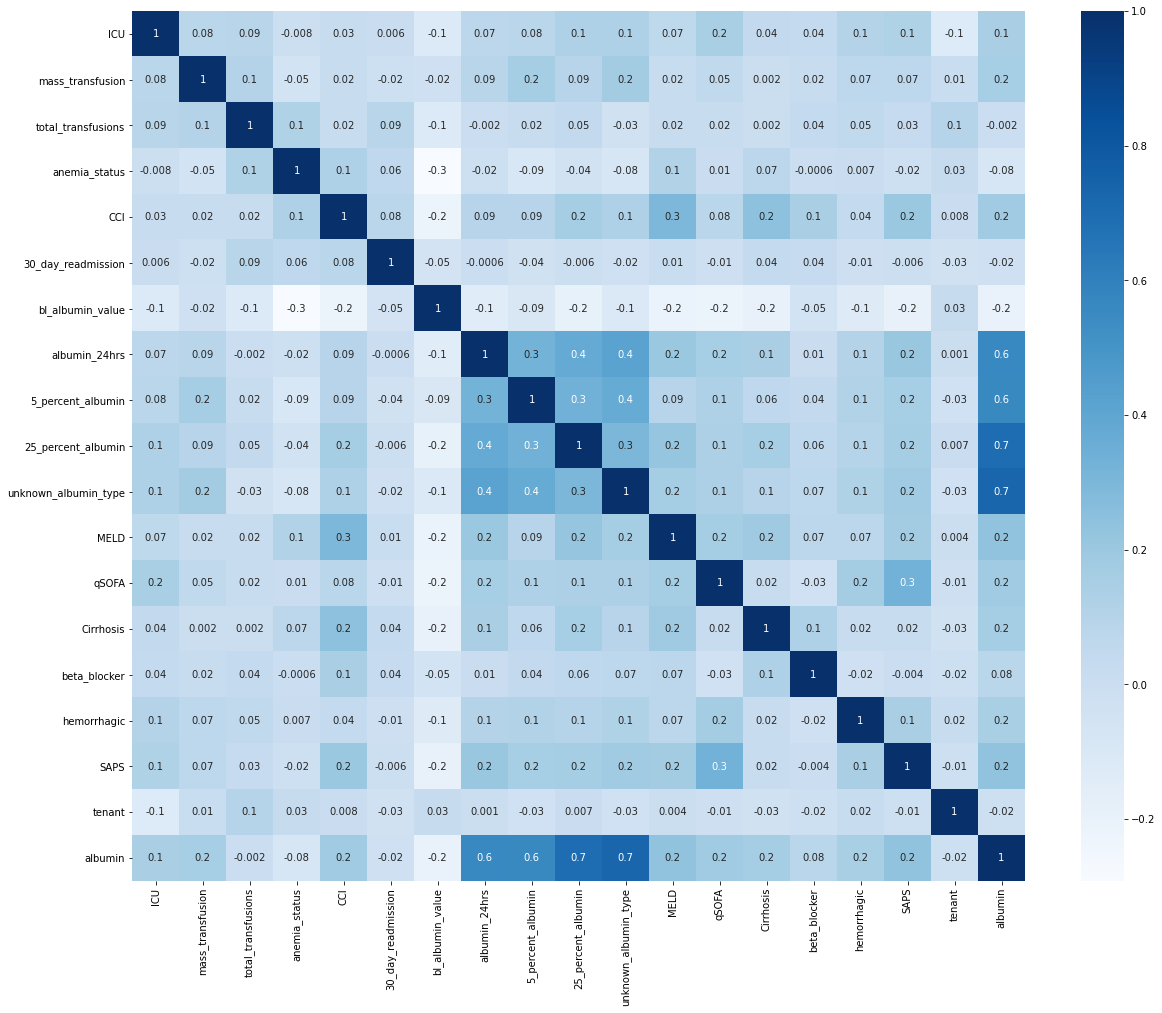

In [102]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [103]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
2    0                 0                   0            3.0    2   
3    0                 0                   0            0.0    2   
4    1                 0                   2            0.0    2   
5    0                 0                   0            2.0    3   

   30_day_readmission  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
0                   0               2.9            0.0                0.0   
2                   0               1.5            0.0                0.0   
3                   0               3.9            1.0                1.0   
4                   0               2.8            0.0                0.0   
5                   0               1.5            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
2                 1.0                   0.0   9.0      0          1   
3                 1.0                   0.0  10.0      0          0   
4                 1.0                   1.0   7.0      0          0   
5                 1.0                   0.0  18.0      3          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
2             0            0    43     111        1  
3             1            0    41      63        1  
4             0            0    21      27        1  
5             1            0    45      63        1

In [104]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_readmission', 'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [105]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [106]:
sig_df

Var      Corr       p-value
0                    ICU  0.006171  2.716472e-01
1       mass_transfusion -0.015747  5.028151e-03
2     total_transfusions  0.088506  3.298033e-56
3          anemia_status  0.058600  1.508898e-25
4                    CCI  0.077209  3.670068e-43
5     30_day_readmission  1.000000  0.000000e+00
6       bl_albumin_value -0.051593  3.708070e-20
7          albumin_24hrs -0.000587  9.167397e-01
8      5_percent_albumin -0.038452  7.285431e-12
9     25_percent_albumin -0.006246  2.659128e-01
10  unknown_albumin_type -0.020296  2.995492e-04
11                  MELD  0.011031  4.940869e-02
12                 qSOFA -0.011754  3.628517e-02
13             Cirrhosis  0.040521  5.168419e-13
14          beta_blocker  0.035261  3.321141e-10
15           hemorrhagic -0.010651  5.778022e-02
16                  SAPS -0.005770  3.040284e-01
17                tenant -0.031400  2.211993e-08
18               albumin -0.020706  2.253376e-04

In [107]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
1       mass_transfusion -0.015747  5.028151e-03
2     total_transfusions  0.088506  3.298033e-56
3          anemia_status  0.058600  1.508898e-25
4                    CCI  0.077209  3.670068e-43
5     30_day_readmission  1.000000  0.000000e+00
6       bl_albumin_value -0.051593  3.708070e-20
8      5_percent_albumin -0.038452  7.285431e-12
10  unknown_albumin_type -0.020296  2.995492e-04
11                  MELD  0.011031  4.940869e-02
12                 qSOFA -0.011754  3.628517e-02
13             Cirrhosis  0.040521  5.168419e-13
14          beta_blocker  0.035261  3.321141e-10
17                tenant -0.031400  2.211993e-08
18               albumin -0.020706  2.253376e-04

In [108]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
0                  ICU  0.006171  0.271647
7        albumin_24hrs -0.000587  0.916740
9   25_percent_albumin -0.006246  0.265913
15         hemorrhagic -0.010651  0.057780
16                SAPS -0.005770  0.304028

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [109]:
df_iv = f_df.drop(columns= ['LOS_hours', '30_day_mortality', '30_day_readmission'])

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    ICU  1.377076
1       mass_transfusion  1.096800
2     total_transfusions  1.488614
3          anemia_status  3.086852
4                    CCI  3.439716
5       bl_albumin_value  8.794135
6          albumin_24hrs  1.603976
7      5_percent_albumin  1.599476
8     25_percent_albumin  2.654550
9   unknown_albumin_type  2.951081
10                  MELD  4.964600
11                 qSOFA  1.776872
12             Cirrhosis  1.466306
13          beta_blocker  1.562962
14           hemorrhagic  1.144938
15                  SAPS  7.194311
16                tenant  7.385774
17               albumin  7.171085


In [111]:
df_iv.drop(columns=['albumin'], inplace=True)

In [112]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    ICU  1.376744
1       mass_transfusion  1.096702
2     total_transfusions  1.486877
3          anemia_status  3.086701
4                    CCI  3.437380
5       bl_albumin_value  8.787399
6          albumin_24hrs  1.490701
7      5_percent_albumin  1.374833
8     25_percent_albumin  1.454894
9   unknown_albumin_type  1.533860
10                  MELD  4.960678
11                 qSOFA  1.776379
12             Cirrhosis  1.464844
13          beta_blocker  1.561801
14           hemorrhagic  1.144016
15                  SAPS  7.179712
16                tenant  7.384163


In [113]:
df_iv.drop(columns=['tenant'], inplace=True)

In [114]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    ICU  1.363179
1       mass_transfusion  1.096575
2     total_transfusions  1.458144
3          anemia_status  3.000761
4                    CCI  3.426883
5       bl_albumin_value  6.017557
6          albumin_24hrs  1.490668
7      5_percent_albumin  1.374233
8     25_percent_albumin  1.452533
9   unknown_albumin_type  1.533820
10                  MELD  4.927730
11                 qSOFA  1.774443
12             Cirrhosis  1.464697
13          beta_blocker  1.561448
14           hemorrhagic  1.141626
15                  SAPS  7.082087


In [115]:
df_iv.drop(columns=['SAPS'], inplace=True)

In [116]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    ICU  1.354442
1       mass_transfusion  1.096198
2     total_transfusions  1.453148
3          anemia_status  2.969899
4                    CCI  3.268513
5       bl_albumin_value  4.346431
6          albumin_24hrs  1.479007
7      5_percent_albumin  1.371071
8     25_percent_albumin  1.451080
9   unknown_albumin_type  1.531437
10                  MELD  4.828303
11                 qSOFA  1.608723
12             Cirrhosis  1.463663
13          beta_blocker  1.561446
14           hemorrhagic  1.133801


In [117]:
print(vif_data['feature'].to_list())

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic']


In [118]:
# 16 independent features
f_df = f_df[['ICU', 'mass_transfusion', 'total_transfusions', \
             'anemia_status', 'CCI', 'bl_albumin_value', \
             'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', \
             'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', \
             'beta_blocker', 'hemorrhagic', 'LOS_hours', '30_day_mortality', \
             '30_day_readmission']]

## Convert Numeric Outcome Variables to Categorical

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [119]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

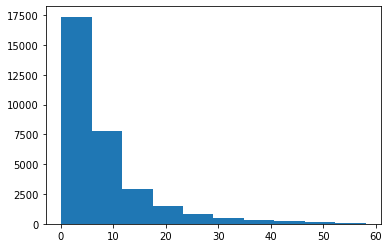

In [120]:
plt.hist(f_df['LOS_days']);

In [121]:
f_df['LOS_days'].describe()

count    31732.000000
mean         8.428758
std          8.643953
min          0.050000
25%          3.165104
50%          5.178472
75%         10.018229
max         58.121528
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [122]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.848611111111111
7.8347222222222195


In [1947]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3, 8, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [1948]:
f_df['LOS_days'].value_counts()

0    11429
2    10271
1    10032
Name: LOS_days, dtype: int64

## Export as csv for other analysis

In [1949]:
f_df.to_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_8.csv', index=False)